In [2]:
from visual_genome import api as vg

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image as PIL_Image
import requests
from io import BytesIO

In [4]:
image_id = vg.get_image_ids_in_range(start_index=0, end_index=1)[0]

In [5]:
image = vg.get_image_data(id=image_id)
image

id: 1, coco_id: -1, flickr_id: -1, width: 800, url: https://cs.stanford.edu/people/rak248/VG_100K_2/1.jpg

In [7]:
regions = vg.get_region_descriptions_of_image(id=image_id)
len(regions), regions[0]

(262,
 id: 1382, x: 421, y: 57, width: 82,height: 139, phrase: the clock is green in colour, image: 1)

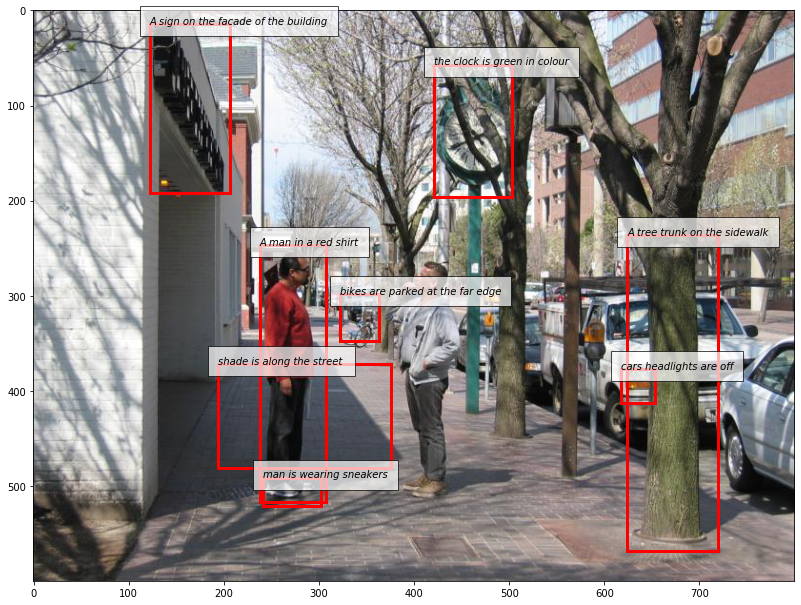

In [12]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
def visualize_regions(image, regions):
    response = requests.get(image.url)
    img = PIL_Image.open(BytesIO(response.content))
    plt.imshow(img)
    ax = plt.gca()
    for region in regions:
        ax.add_patch(Rectangle((region.x, region.y),
                               region.width,
                               region.height,
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(region.x, region.y, region.phrase, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()
visualize_regions(image, regions[:8])